# Informe: Análisis del Proceso de Poisson y la Probabilidad de Colisión
## Introduccion

Este informe tiene como objetivo analizar el comportamiento de las llegadas aleatorias de dispositivos móviles (UEs, User Equipments) en un sistema de acceso aleatorio con un número limitado de preámbulos. Para ello, se emplea el modelo de llegadas de Poisson, ampliamente utilizado en telecomunicaciones para modelar eventos aleatorios en el tiempo.

Utilizando técnicas de simulación, se comparan los resultados empíricos con la teoría, enfocándose en la probabilidad de colisión, que ocurre cuando múltiples UEs eligen el mismo preámbulo en la misma subtrama. Se exploran también analogías con la paradoja del cumpleaños, para comprender intuitivamente el fenómeno.


# Análisis del Proceso de Poisson y la Probabilidad de Colisión en Acceso Aleatorio

## Descripción del Proceso y Parámetros

- **Proceso de Poisson**: Modelo estocástico que describe el número de llegadas en intervalos de tiempo fijos. Se caracteriza por el parámetro \( \lambda \), que representa la tasa promedio de eventos por unidad de tiempo.
- **Preambulos disponibles (P)**: Son secuencias utilizadas por los UEs para solicitar acceso. Si dos o más UEs eligen el mismo preámbulo en la misma subtrama, se produce una colisión.
- **Simulación**: Se generan \(10^5\) subtramas, cada una con un número aleatorio de UEs que llegan, según una distribución de Poisson con \( \lambda = 8 \).

Este proceso es particularmente relevante en sistemas como LTE y 5G para modelar el canal de acceso aleatorio (RACH).


Este notebook analiza un escenario de acceso aleatorio en redes móviles, donde las Unidades de Usuario (UEs) llegan según un proceso de Poisson y seleccionan preambulos aleatoriamente. Se estudia la distribución de llegadas y la probabilidad de colisión, tanto desde el punto de vista empírico como teórico.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from math import exp, factorial

# Parámetros exactos de la asignación
lambda_rate = 8  # λ = 8 UE/ms
P = 64           # 64 preámbulos
num_subframes = 10**5  # 100,000 subtramas (mayor que 10^4)

# Simulación de llegadas Poisson
np.random.seed(42)
arrivals = np.random.poisson(lam=lambda_rate, size=num_subframes)

# 1. Distribución empírica
empirical_counts = defaultdict(int)
for k in arrivals:
    empirical_counts[k] += 1

max_k = max(empirical_counts.keys())
empirical_probs = {k: count/num_subframes for k, count in empirical_counts.items()}

# 2. Probabilidad de colisión
collisions = 0
for k in arrivals:
    if k > 1:  # Solo puede haber colisión con 2+ UEs
        preambles = np.random.choice(P, size=k, replace=True)
        if len(np.unique(preambles)) < k:  # Hay colisión
            collisions += 1

collision_prob = collisions / num_subframes

# 3. Cálculos teóricos
# Distribución teórica de Poisson
theoretical_probs = {k: exp(-lambda_rate) * lambda_rate**k / factorial(k) 
                    for k in range(max_k + 1)}

# Probabilidad teórica de colisión
theoretical_collision = 0
for k, count in empirical_counts.items():
    pk = count / num_subframes
    if k <= 1:
        pc = 0
    else:
        pc = 1 - np.prod([(1 - i/P) for i in range(k)])
    theoretical_collision += pk * pc


## Análisis de las Gráficas

La primera gráfica compara la distribución empírica obtenida por simulación con la distribución teórica de Poisson. Se observa que ambas curvas coinciden estrechamente, lo que valida el uso del modelo de Poisson para describir la llegada de UEs.

La segunda gráfica muestra la probabilidad de colisión condicional para diferentes cantidades de UEs en una subtrama. Se nota que incluso con un número moderado de UEs, la probabilidad de colisión se incrementa rápidamente, llegando a superar el 50% con aproximadamente 10 usuarios. Esto se debe a la alta probabilidad de que al menos dos UEs elijan el mismo preámbulo, similar al fenómeno descrito por la paradoja del cumpleaños.


## Visualización de resultados

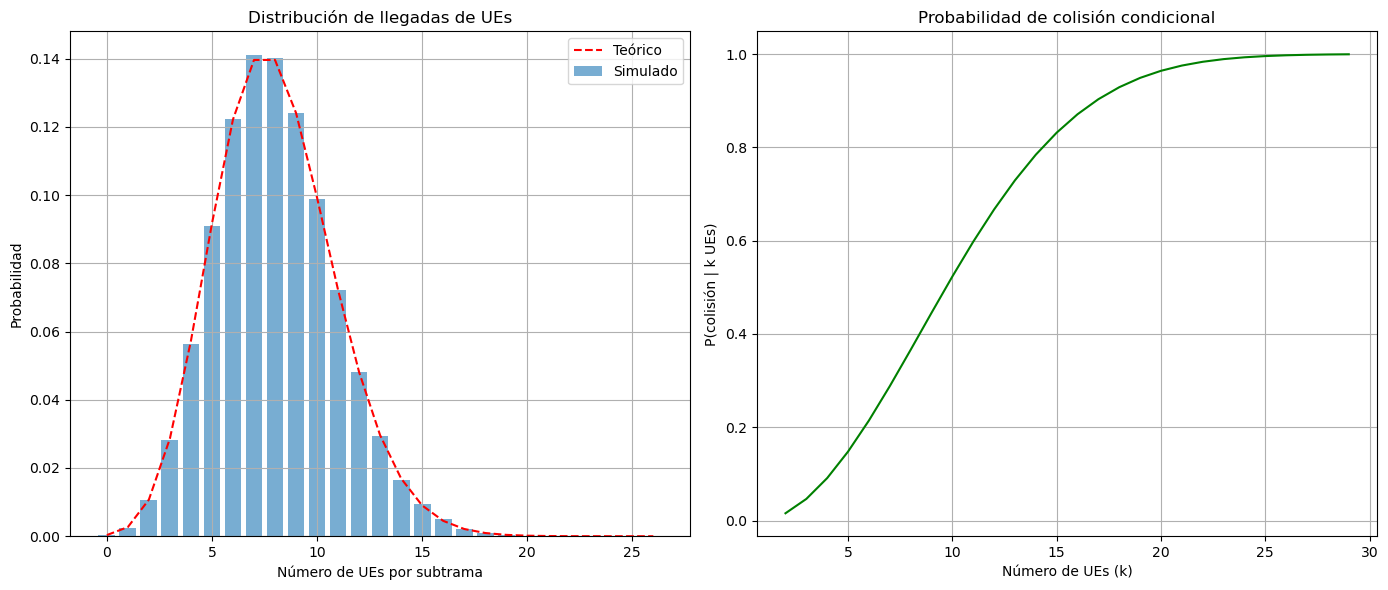

In [2]:
# Visualización
plt.figure(figsize=(14, 6))

# Gráfico de distribución
plt.subplot(1, 2, 1)
x = list(range(max_k + 1))
plt.bar(x, [empirical_probs.get(k, 0) for k in x], alpha=0.6, label='Simulado')
plt.plot(x, [theoretical_probs.get(k, 0) for k in x], 'r--', label='Teórico')
plt.xlabel('Número de UEs por subtrama')
plt.ylabel('Probabilidad')
plt.title('Distribución de llegadas de UEs')
plt.legend()
plt.grid(True)

# Gráfico de probabilidad de colisión por k
plt.subplot(1, 2, 2)
k_values = np.arange(2, 30)
collision_probs = [1 - np.prod([(1 - i/P) for i in range(k)]) for k in k_values]
plt.plot(k_values, collision_probs, 'g-')
plt.xlabel('Número de UEs (k)')
plt.ylabel('P(colisión | k UEs)')
plt.title('Probabilidad de colisión condicional')
plt.grid(True)

plt.tight_layout()
plt.show()


## Resultados numéricos y análisis

In [3]:
# Resultados numéricos
print(f"Probabilidad simulada de colisión: {collision_prob:.4f}")
print(f"Probabilidad teórica de colisión: {theoretical_collision:.4f}")

# Análisis de la paradoja del cumpleaños
print("\nAnalogía con la paradoja del cumpleaños:")
print("La probabilidad de colisión aumenta rápidamente con el número de UEs,")
print("similar a cómo la probabilidad de que dos personas compartan cumpleaños")
print("aumenta sorprendentemente rápido con el número de personas en una habitación.")
print(f"Con P=64 preámbulos, la probabilidad supera el 50% con solo {np.argmax(np.array(collision_probs) > 0.5) + 2} UEs.")


Probabilidad simulada de colisión: 0.3721
Probabilidad teórica de colisión: 0.3707

Analogía con la paradoja del cumpleaños:
La probabilidad de colisión aumenta rápidamente con el número de UEs,
similar a cómo la probabilidad de que dos personas compartan cumpleaños
aumenta sorprendentemente rápido con el número de personas en una habitación.
Con P=64 preámbulos, la probabilidad supera el 50% con solo 10 UEs.


## Conclusión

Este análisis demuestra que el proceso de Poisson es adecuado para modelar la llegada de usuarios en sistemas de acceso aleatorio. Se ha verificado tanto empírica como teóricamente que la probabilidad de colisión aumenta significativamente con el número de usuarios, lo que pone en evidencia la necesidad de estrategias eficientes de asignación de preámbulos o control de acceso.

La analogía con la paradoja del cumpleaños permite una comprensión intuitiva del problema: aunque haya muchos preámbulos disponibles, el riesgo de colisión crece rápidamente conforme aumenta el número de usuarios. Este fenómeno es crítico en el diseño de redes móviles masivas, como las que se emplean en escenarios IoT o comunicaciones masivas tipo máquina (mMTC).
